In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('cleaned_file.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
3349,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
3350,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
3351,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.head
data.info
data.isnull().sum

<bound method DataFrame.sum of         age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0     False  False  False     False  False  False    False    False  False   
1     False  False  False     False  False  False    False    False  False   
2     False  False  False     False  False  False    False    False  False   
3     False  False  False     False  False  False    False    False  False   
4     False  False  False     False  False  False    False    False  False   
...     ...    ...    ...       ...    ...    ...      ...      ...    ...   
3348  False  False  False     False  False  False    False    False  False   
3349  False  False  False     False  False  False    False    False  False   
3350  False  False  False     False  False  False    False    False  False   
3351  False  False  False     False  False  False    False    False  False   
3352  False  False  False     False  False  False    False    False  False   

      oldpeak  slope     ca   th

In [4]:
data.describe
data["target"].describe
data["target"].isnull

<bound method Series.isnull of 0       0
1       0
2       0
3       0
4       0
       ..
3348    1
3349    0
3350    0
3351    1
3352    0
Name: target, Length: 3353, dtype: int64>

In [5]:
data["target"].isnull().sum()


np.int64(0)

In [6]:
data['target'].value_counts()
X = data.drop(columns=['target'])  
y = data['target']  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2347, 13), (1006, 13), (2347,), (1006,))

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [9]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

In [10]:
Y_pred_xgb.shape

(1006,)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Slightly underfit XGBoost model
xgb_model = XGBClassifier(
    n_estimators=90,         # slightly fewer trees
    max_depth=3,             # slightly shallow trees
    learning_rate=0.15,      # slower but not too slow
    subsample=0.95,          # almost all samples
    colsample_bytree=0.95,   # almost all features
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit model
eval_set = [(X_train, Y_train), (X_test, Y_test)]
xgb_model.fit(X_train, Y_train,
              eval_set=eval_set,
              verbose=False)



# Predictions
Y_train_pred = xgb_model.predict(X_train)
Y_test_pred = xgb_model.predict(X_test)

# Accuracy
train_acc = accuracy_score(Y_train, Y_train_pred)
test_acc = accuracy_score(Y_test, Y_test_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


Train Accuracy: 0.96
Test Accuracy: 0.94


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [06:23:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [12]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# **1. Random Forest Classifier**

rf_model = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

# **2. Support Vector Classifier (SVC)**
svc_model = SVC(C=0.1, kernel='rbf', gamma=0.01)
svc_model.fit(X_train, Y_train)
Y_pred_svc = svc_model.predict(X_test)
svc_accuracy = accuracy_score(Y_test, Y_pred_svc)
print(f"SVM Accuracy: {svc_accuracy}")

# **3. Decision Tree Classifier**
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# **4. k-Nearest Neighbors (KNN)**
knn_model = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(Y_test, Y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}")

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
Y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(Y_test, Y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy}")


Random Forest Accuracy: 0.8777335984095428
SVM Accuracy: 0.8409542743538767
Decision Tree Accuracy: 0.8409542743538767
KNN Accuracy: 0.8777335984095428
Logistic Regression Accuracy: 0.8300198807157058


In [13]:
import pickle
with open("finalxgb_model.pkl", "wb") as model_file:
    pickle.dump(xgb_model, model_file)

# Save the StandardScaler as well
with open("finalscaler.pkl", "wb") as scaler_file:
    pickle.dump(sc, scaler_file)

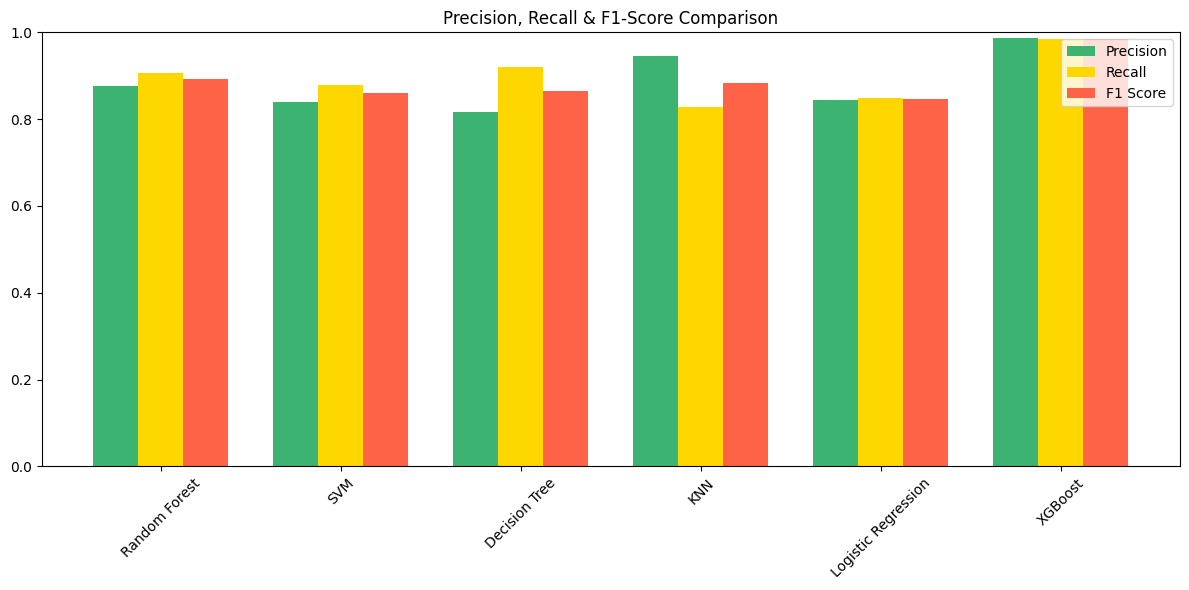

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Predictions
import matplotlib.pyplot as plt
models = {
    'Random Forest': Y_pred_rf,
    'SVM': Y_pred_svc,
    'Decision Tree': Y_pred_dt,
    'KNN': Y_pred_knn,
    'Logistic Regression': Y_pred_log,
    'XGBoost': Y_pred_xgb
}
precision_vals, recall_vals, f1_vals = [], [], []
for name, y_pred in models.items():
    precision_vals.append(precision_score(Y_test, y_pred))
    recall_vals.append(recall_score(Y_test, y_pred))
    f1_vals.append(f1_score(Y_test, y_pred))
x = list(models.keys())
# Plot grouped bar chart
x_axis = range(len(x))
width = 0.25
plt.figure(figsize=(12, 6))
plt.bar([i - width for i in x_axis], precision_vals, width=width, label='Precision', color='mediumseagreen')
plt.bar(x_axis, recall_vals, width=width, label='Recall', color='gold')
plt.bar([i + width for i in x_axis], f1_vals, width=width, label='F1 Score', color='tomato')
plt.xticks(x_axis, x, rotation=45)
plt.ylim(0, 1)
plt.title("Precision, Recall & F1-Score Comparison")
plt.legend()
plt.tight_layout()
plt.show()

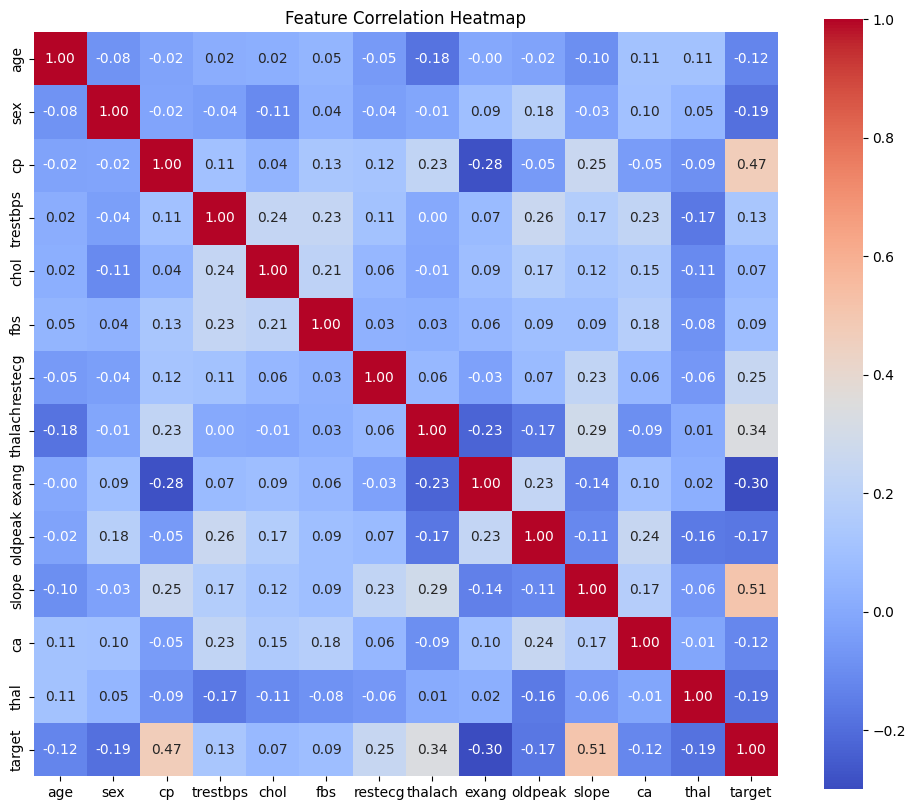

In [15]:
import seaborn as sns
corr_matrix = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

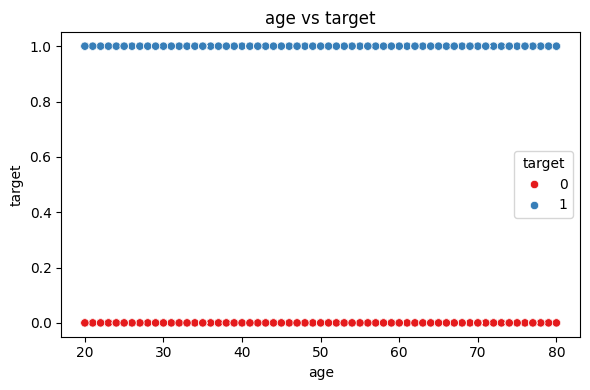

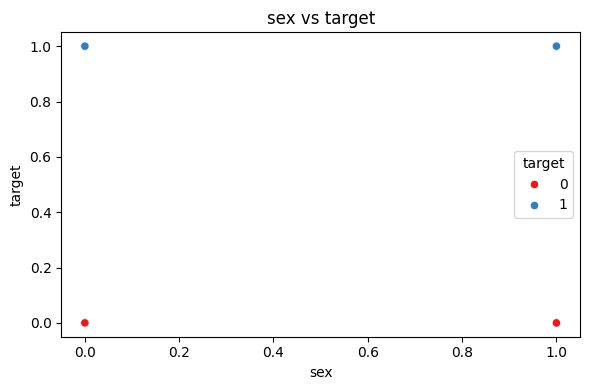

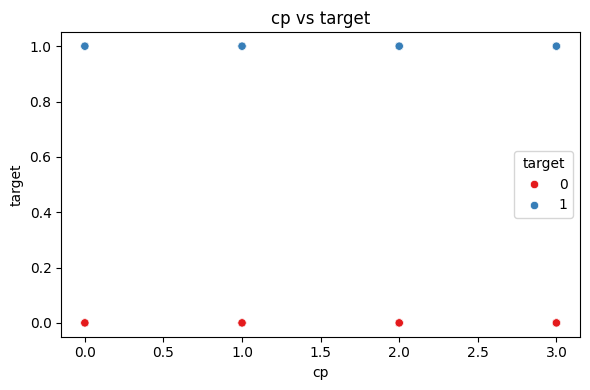

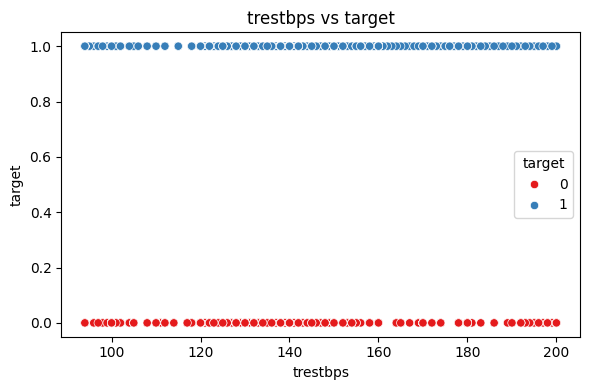

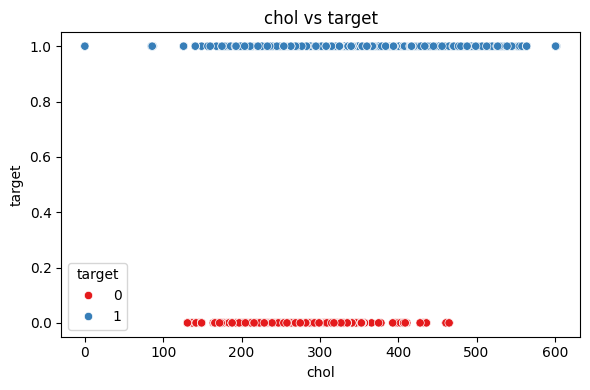

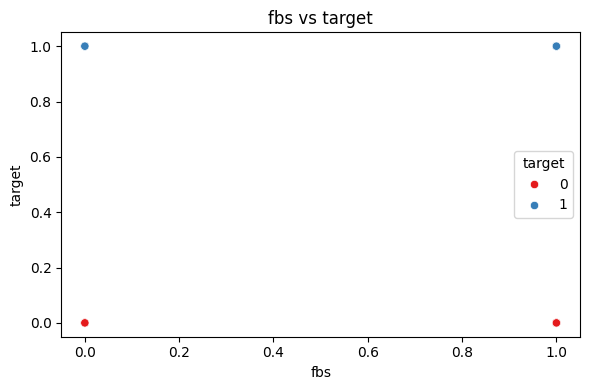

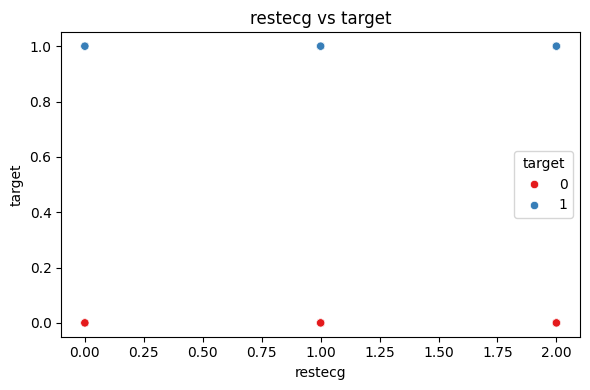

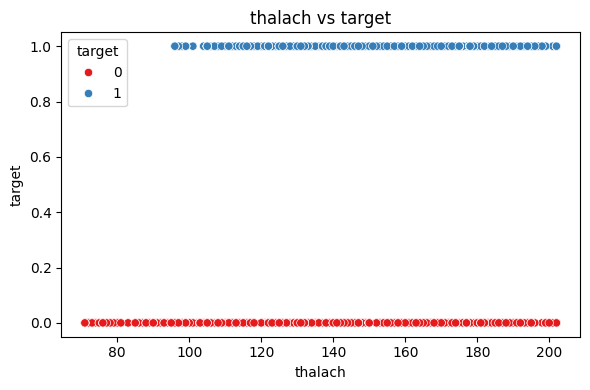

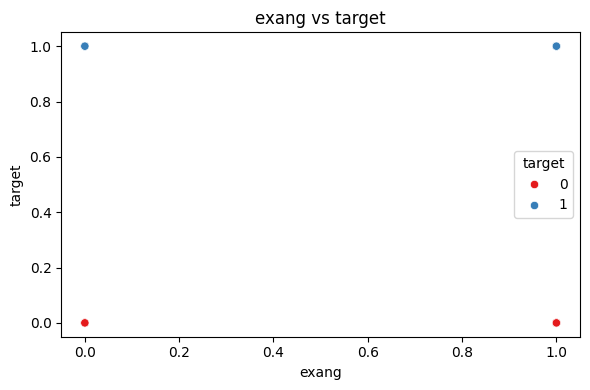

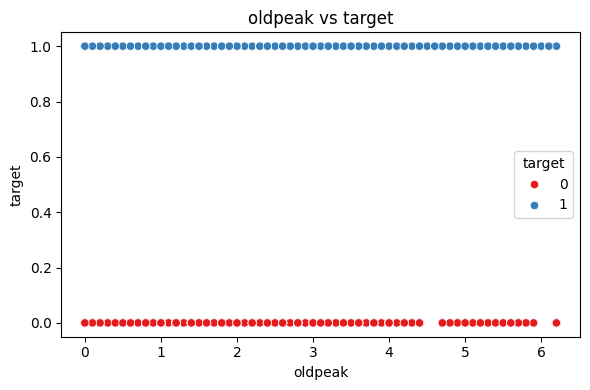

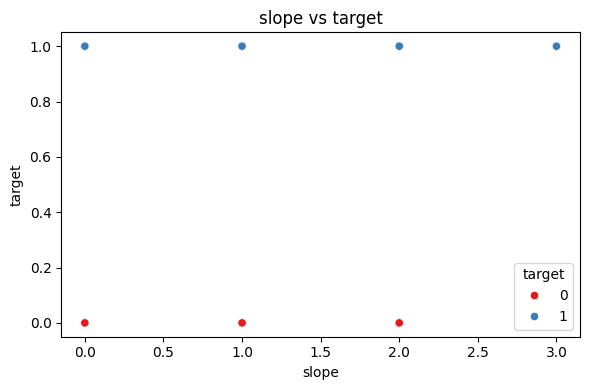

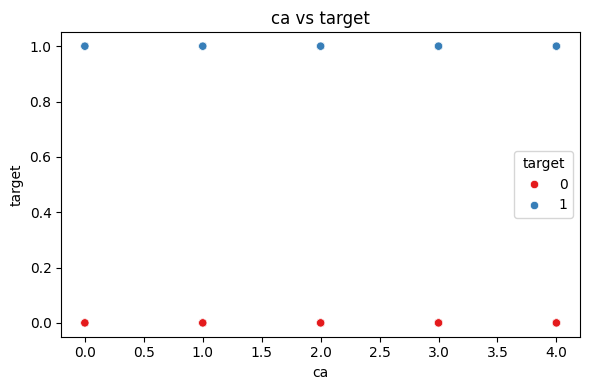

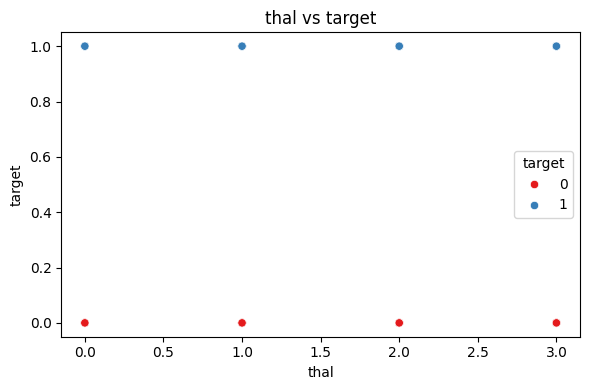

In [16]:
target_col = "target" 

for col in data.select_dtypes(include='number').columns:
    if col != target_col:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data, x=col, y=target_col, hue=target_col, palette='Set1')
        plt.title(f"{col} vs {target_col}")
        plt.tight_layout()
        plt.show()

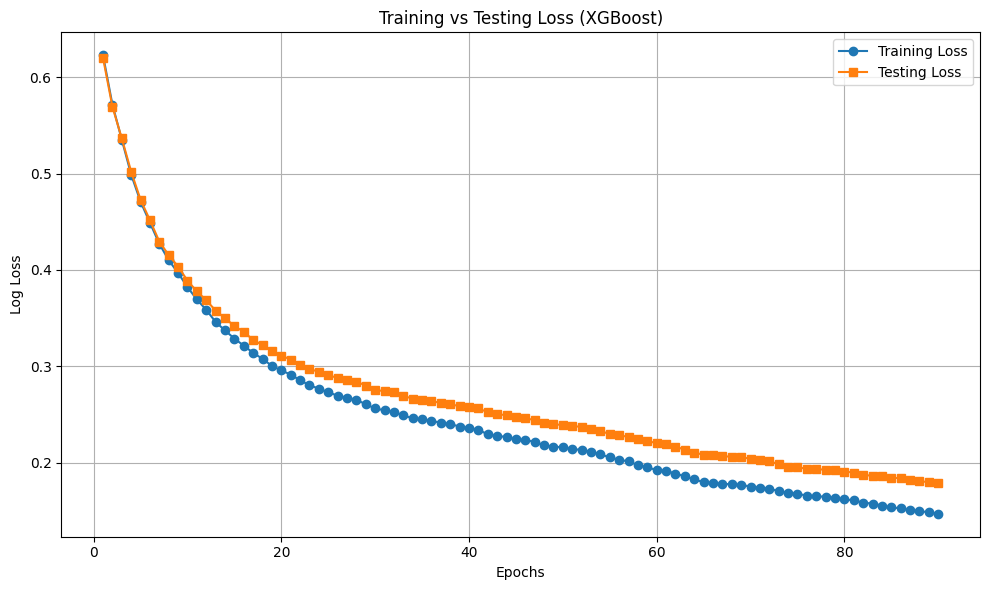

In [19]:
results = xgb_model.evals_result()

# Extract and plot
epochs = range(1, len(results['validation_0']['logloss']) + 1)
train_loss = results['validation_0']['logloss']
test_loss = results['validation_1']['logloss']

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, test_loss, label='Testing Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training vs Testing Loss (XGBoost)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
